In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>")) # makes the notebook fill the whole window

In [117]:
import pandas as pd
import numpy as np
import re
import numpy as np

import plotly.express as px
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import mean_squared_error

from yt_utils import YouTubeAccessor, YouTubeCategories

In [71]:
trending_url = "https://squeemos.pythonanywhere.com/static/yt_trending.feather"
categories_url = "https://squeemos.pythonanywhere.com/static/yt_categories.feather"
cats_url = "https://squeemos.pythonanywhere.com/static/video_categories.json"

In [72]:
categories = YouTubeCategories(cats_url, local = False)

In [105]:
df = pd.read_feather(categories_url)

In [106]:
def convert_pt_to_time(string):
    times = re.findall(r"\d+", string)
    if len(times) == 1:
        return int(times[0])
    elif len(times) == 2:
        minutes, seconds = times
        return int(minutes) * 60 + int(seconds)
    elif len(times) == 3:
        hours, minutes, seconds = times
        return int(hours) * 3600 + int(minutes) * 60 + int(seconds)
    elif len(times) == 4:
        days, hours, minutes, seconds = times
        return int(days) * 86400 + int(hours) * 3600 + int(minutes) * 60 + int(seconds)
    else:
        raise Exception(f"More than 4 things trying to be unpacked. {string} {times}")

In [ ]:
def convert_pt_to_time(string):
    times = re.findall(r"\d+", string)
    match len(times):
        

In [107]:
df[df.yt.get_alias("duration")] = df.yt["duration"].apply(convert_pt_to_time)

In [108]:
mini_df = df.drop_duplicates(subset = df.yt.get_alias("id"), keep = "last", ignore_index = True).copy()
#subset = mini_df.select_dtypes(include = [np.number])

In [125]:
len(mini_df)

2568

In [61]:
px.histogram(
    mini_df,
    x = mini_df.yt.get_alias("duration"),
    nbins = 50,
)

In [40]:
x_data = np.array(mini_df.yt["duration"]).reshape(-1, 1)
y_data = mini_df.yt["viewCount"]

x_train, x_test, y_train, y_test = tts(x_data, y_data, test_size = .2)

In [41]:
model = SVC()
model = model.fit(x_train, y_train)
predictions = model.predict(x_test)

loss = mean_squared_error(predictions, y_test)
print(f"{loss:,}")

128,962,062,715,595.95


In [42]:
model = DecisionTreeRegressor()
model = model.fit(x_train, y_train)
predictions = model.predict(x_test)

loss = mean_squared_error(predictions, y_test)
print(f"{loss:,}")

128,898,386,356,829.45


<AxesSubplot: >

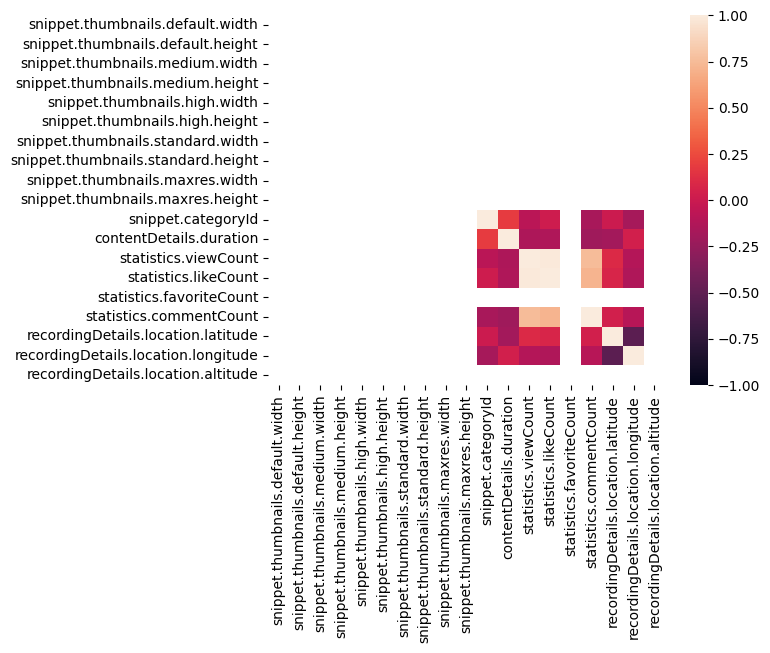

In [52]:
sns.heatmap(subset.dropna().corr(), vmin = -1.0)

In [62]:
px.scatter(
    mini_df,
    x = df.yt.get_alias("categoryId"),
    y = df.yt.get_alias("duration"),
    color = df.yt.get_alias("title"),
)

In [114]:
mini_df["categoryName"] = mini_df.yt["categoryId"].apply(lambda x : categories.id_to_title[x])
mini_df["log_duration"] = mini_df.yt["duration"].apply(np.log2)

px.box(
    mini_df,
    x = mini_df.yt.get_alias("categoryName"),
    y = mini_df.yt.get_alias("log_duration"),
)

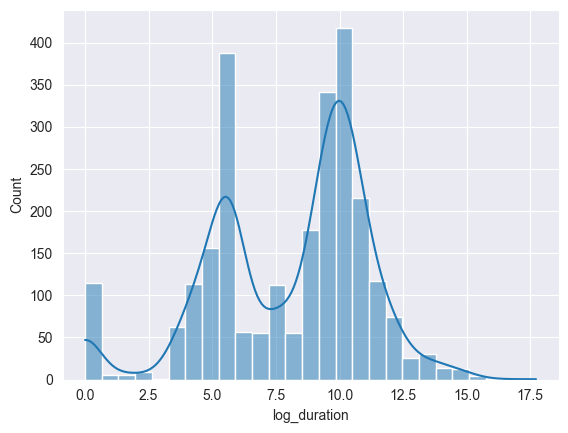

In [124]:
sns.set_style("darkgrid")
sns.histplot(data = mini_df, x = mini_df.yt.get_alias("log_duration"), kde = True)
plt.show()